In [1]:
from google.colab import files
uploaded = files.upload()

Saving Microsoft_Stock_Price_History.csv to Microsoft_Stock_Price_History.csv


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      251 non-null    object 
 1   Price     251 non-null    float64
 2   Open      251 non-null    float64
 3   High      251 non-null    float64
 4   Low       251 non-null    float64
 5   Vol.      251 non-null    object 
 6   Change %  251 non-null    object 
dtypes: float64(4), object(3)
memory usage: 13.9+ KB
None

First 5 Rows:
         Date   Price    Open    High     Low    Vol. Change %
0  12/06/2024  443.57  442.30  446.10  441.77  18.82M    0.21%
1  12/05/2024  442.62  437.92  444.66  436.17  21.70M    1.19%
2  12/04/2024  437.42  433.03  439.67  432.63  26.01M    1.44%
3  12/03/2024  431.20  429.84  432.47  427.74  18.30M    0.05%
4  12/02/2024  430.98  421.57  433.00  421.31  20.21M    1.78%

Missing Values:
 Date        0
Price       0
Open        0
High        0
Low   

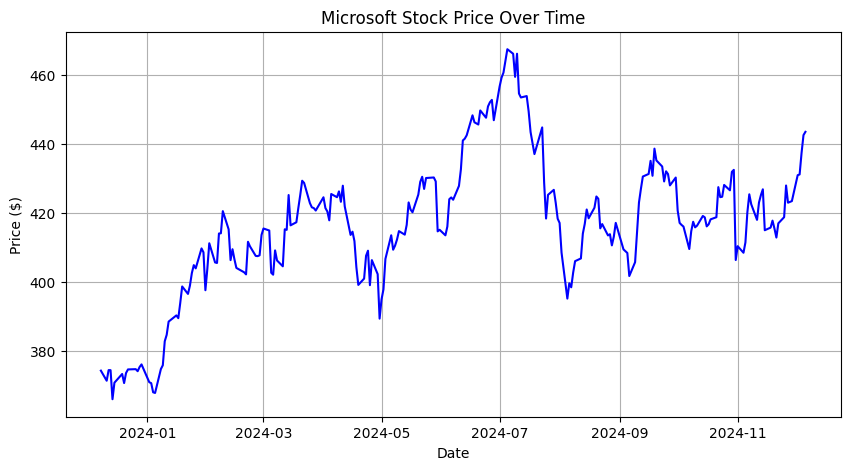

Insight 1: The stock price trend shows long-term growth with periodic dips, reflecting market reactions to events.


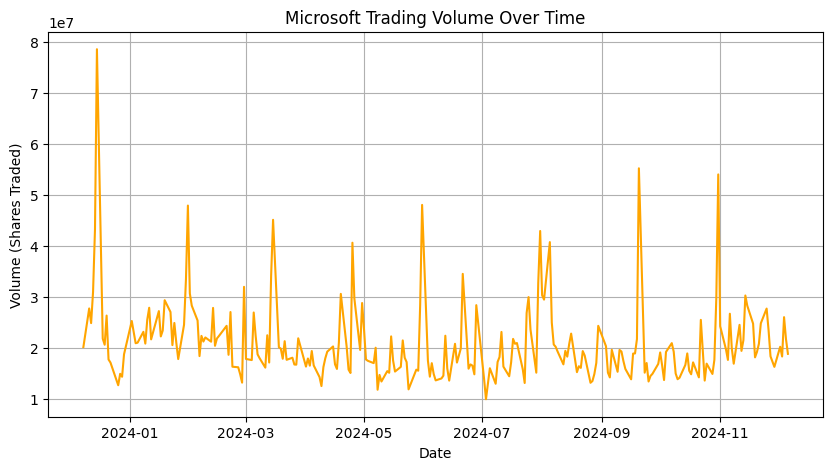

Insight 2: The trading volume spikes indicate times of major market activity, such as earnings reports or news announcements.


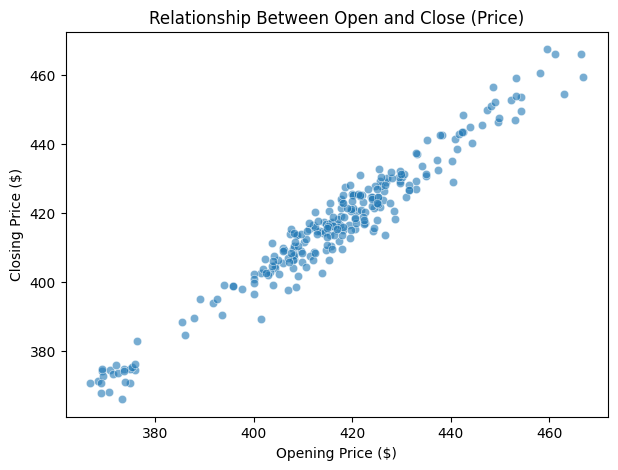

Insight 3: The scatter plot shows a strong linear relationship between opening and closing prices, suggesting consistent daily movement patterns.


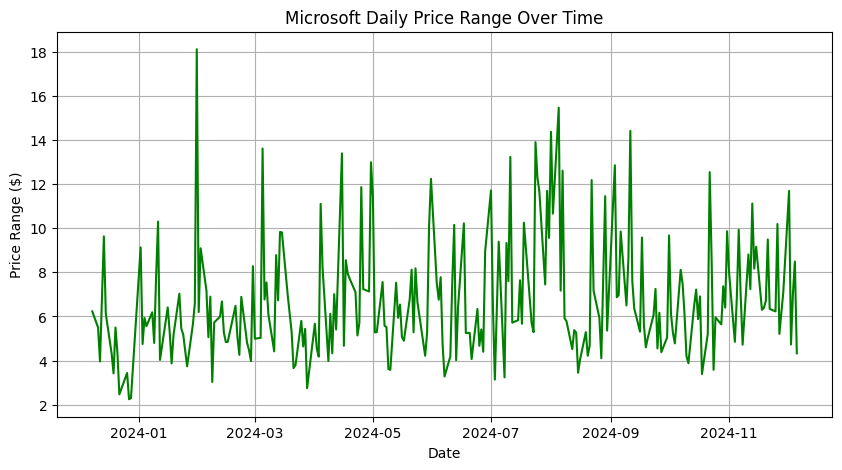

Insight 4: The daily range shows periods of high volatility — wider ranges often align with uncertain market conditions.


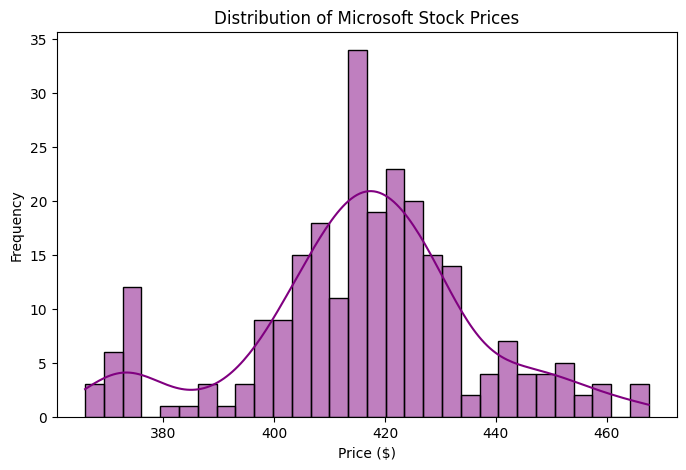

Insight 5: The histogram shows that most prices cluster around the mid-range, with fewer extreme highs or lows.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Microsoft_Stock_Price_History.csv")
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
def convert_volume(val):
    if isinstance(val, str):
        val = val.replace(',', '').strip()
        if 'M' in val:
            return float(val.replace('M', '')) * 1_000_000
        elif 'K' in val:
            return float(val.replace('K', '')) * 1_000
        elif val == '-':
            return None
        else:
            return float(val)
    return val
df['Vol.'] = df['Vol.'].apply(convert_volume)
print("\nMissing Values:\n", df.isnull().sum())
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Price'], color='blue')
plt.title('Microsoft Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()
print("Insight 1: The stock price trend shows long-term growth with periodic dips, reflecting market reactions to events.")
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Vol.'], color='orange')
plt.title('Microsoft Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (Shares Traded)')
plt.grid(True)
plt.show()
print("Insight 2: The trading volume spikes indicate times of major market activity, such as earnings reports or news announcements.")
plt.figure(figsize=(7,5))
sns.scatterplot(x='Open', y='Price', data=df, alpha=0.6)
plt.title('Relationship Between Open and Close (Price)')
plt.xlabel('Opening Price ($)')
plt.ylabel('Closing Price ($)')
plt.show()
print("Insight 3: The scatter plot shows a strong linear relationship between opening and closing prices, \
suggesting consistent daily movement patterns.")
df['Daily Range'] = df['High'] - df['Low']
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Daily Range'], color='green')
plt.title('Microsoft Daily Price Range Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range ($)')
plt.grid(True)
plt.show()
print("Insight 4: The daily range shows periods of high volatility — wider ranges often align with uncertain market conditions.")
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, color='purple', kde=True)
plt.title('Distribution of Microsoft Stock Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()
print("Insight 5: The histogram shows that most prices cluster around the mid-range, with fewer extreme highs or lows.")
